# Suicide Rate Analysis and Forecasting using Prophet
# Dataset Source: https://www.kaggle.com/datasets/sahilislam007/death-rates-by-suicide
# Author: Azubogu Ifechukwu Success
# Description: This notebook performs exploratory data analysis and time series forecasting on suicide death rates across US states.



#### -----------------------------------
#### STEP 1: Import and Load Dataset in Jupyter Notebook
#### -----------------------------------

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Death_rates_for_suicide_by_sex_race_Hispanic_origin_and_age_United.csv")

# Strip whitespace from column names
df.columns = df.columns.str.strip()


#### -----------------------------------
####  STEP 2: Data Cleaning
#### -----------------------------------

In [7]:
# Check for key columns
print(df.columns)

# Drop rows where ESTIMATE is missing (our target)
df = df.dropna(subset=["ESTIMATE"])

# Convert YEAR to datetime format
df["YEAR"] = pd.to_datetime(df["YEAR"].astype(str), format="%Y", errors='coerce')

# Drop null YEARs
df = df.dropna(subset=["YEAR"])


Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')



#### -----------------------------------
####  STEP 3: Exploratory Data Analysis
#### -----------------------------------

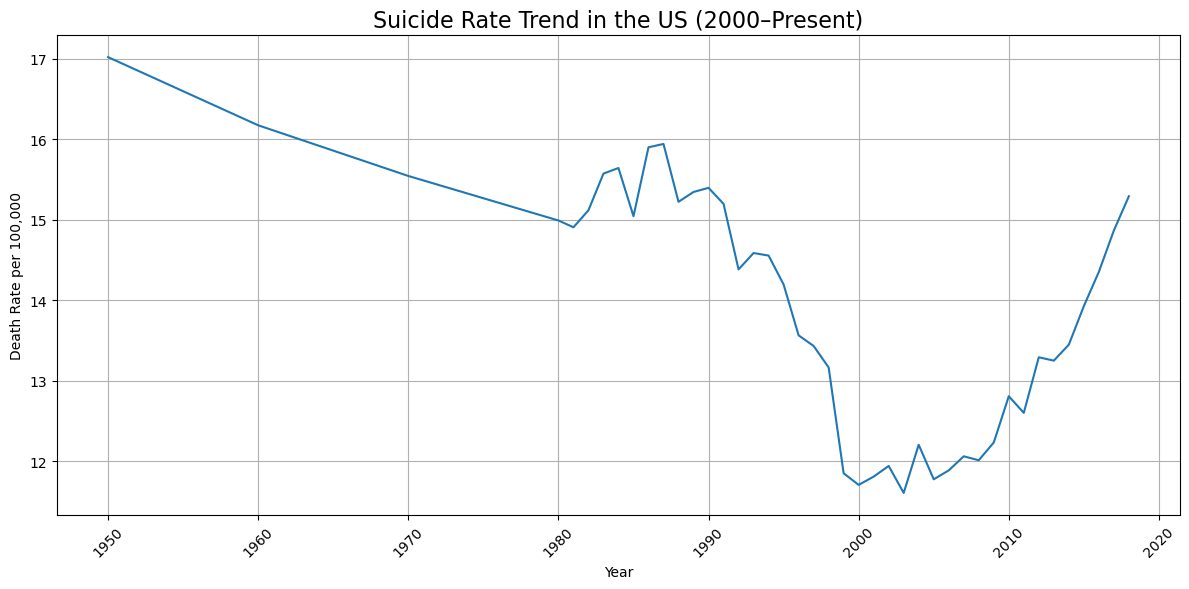

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="YEAR", y="ESTIMATE", errorbar=None)
plt.title("Suicide Rate Trend in the US (2000–Present)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Death Rate per 100,000")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### -----------------------------------
####  STEP 4: Prepare for Forecasting
#### -----------------------------------

In [9]:
# Group data annually
prophet_df = df.groupby("YEAR")["ESTIMATE"].mean().reset_index()

# Rename columns for Prophet
prophet_df.columns = ["ds", "y"]


#### -----------------------------------
#### STEP 5: Train Prophet Forecasting Model
#### -----------------------------------

In [36]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)

00:20:55 - cmdstanpy - INFO - Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing


#### -----------------------------------
#### STEP 6: Forecast the Next 5 Years
#### -----------------------------------

In [11]:
# Create future DataFrame
future = model.make_future_dataframe(periods=5, freq='YE')

# Forecast
forecast = model.predict(future)


#### -----------------------------------
####  STEP 7: Save Model for Streamlit App
#### -----------------------------------

In [12]:
import joblib

joblib.dump(model, "suicide_forecast_model.pkl")


['suicide_forecast_model.pkl']

#### -----------------------------------
####  Step 8: Group Data by Year and Compute Average Suicide Rates
#### -----------------------------------

In [13]:
# Group the data by year and calculate the average suicide rate
yearly_data = df.groupby(df["YEAR"].dt.year)["ESTIMATE"].mean().reset_index()

# Rename columns for clarity
yearly_data.columns = ["Year", "Average Suicide Rate"]

# Display the table
yearly_data


,Year,Average Suicide Rate
0,1950,17.017568
1,1960,16.171233
2,1970,15.542105
3,1980,14.989247
4,1981,14.904938
5,1982,15.116049
6,1983,15.571250
7,1984,15.640741
8,1985,15.042373
9,1986,15.898077
